# !pip install imblearn 

In [1]:
from imblearn.over_sampling import SMOTE
from math import isnan
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
import pandas as pd
from pandas_profiling import ProfileReport
import os 
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import balanced_accuracy_score, accuracy_score, f1_score, precision_score,recall_score, fbeta_score,roc_auc_score
from collections import Counter
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from category_encoders.binary import BinaryEncoder
from pandas_profiling import ProfileReport
from sklearn.metrics import plot_roc_curve,plot_confusion_matrix
import optuna
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report,roc_curve


In [2]:
# скрываем предупреждения
warnings.filterwarnings('ignore')

In [4]:
path = os.path.abspath('heart_disease_uci.csv')
path

'C:\\Users\\new\\Desktop\\heart-project\\heart_disease_uci.csv'

In [5]:
data = pd.read_csv(path,index_col=0)

In [6]:
data.select_dtypes(exclude='number').columns.tolist()

['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

In [7]:
def counter_of_type(data):
    return Counter(data.dtypes)
    

In [8]:
# Функция для ознакомления с данными
def pre_view(data,n_row=4,
             head=True,
             info=True,
             columns=True,
             shape=True,
             isna=True,
             duplicated=True,
             dtypes_=True,
            describe_=True):
    if head:
        print(f'First {n_row} row(s) in the head of data')
        display(data.head(n_row))
        print('-'*30)
    if info:
        print('Data Information:')
        display(data.info())
        print('-'*30)
    if columns:
        print('Data columns:')
        display(data.columns)
        print('-'*30)
    if shape:
        print('Data shape:')
        display(data.shape)
        print('-'*30)
    if isna:
        print('Data isna by row mean:')
        display(data.isna().mean())
        print('-'*30)
    if duplicated:
        print('Data clear duplicates sum:')
        display(data.duplicated().sum())
        print('-'*30)
    if dtypes_:
        print('Data dtypes:')
        display(data.dtypes)
        print('Number of each type:')
        print(counter_of_type(data))
        print('-'*30)
    if describe_:
        print('Major statistics for data:')
        display(data.describe())
        

In [9]:
pre_view(data)

First 4 row(s) in the head of data


,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,,,,,,,,,,,,,,,
1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0


------------------------------
Data Information:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 1 to 920
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   dataset   920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  861 non-null    float64
 5   chol      890 non-null    float64
 6   fbs       830 non-null    object 
 7   restecg   918 non-null    object 
 8   thalch    865 non-null    float64
 9   exang     865 non-null    object 
 10  oldpeak   858 non-null    float64
 11  slope     611 non-null    object 
 12  ca        309 non-null    float64
 13  thal      434 non-null    object 
 14  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 115.0+ KB


None

------------------------------
Data columns:


Index(['age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

------------------------------
Data shape:


(920, 15)

------------------------------
Data isna by row mean:


age         0.000000
sex         0.000000
dataset     0.000000
cp          0.000000
trestbps    0.064130
chol        0.032609
fbs         0.097826
restecg     0.002174
thalch      0.059783
exang       0.059783
oldpeak     0.067391
slope       0.335870
ca          0.664130
thal        0.528261
num         0.000000
dtype: float64

------------------------------
Data clear duplicates sum:


2

------------------------------
Data dtypes:


age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

Number of each type:
Counter({dtype('O'): 8, dtype('float64'): 5, dtype('int64'): 2})
------------------------------
Major statistics for data:


,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [10]:
data.corr(method='spearman')

тут

,age,trestbps,chol,thalch,oldpeak,ca,num
age,1.000000,0.259390,-0.037350,-0.348333,0.287774,0.391373,0.347184
trestbps,0.259390,1.000000,0.104124,-0.090019,0.161414,0.070735,0.126805
chol,-0.037350,0.104124,1.000000,0.175163,0.048178,0.113139,-0.157563
thalch,-0.348333,-0.090019,0.175163,1.000000,-0.188105,-0.285559,-0.398360
oldpeak,0.287774,0.161414,0.048178,-0.188105,1.000000,0.254469,0.434273
ca,0.391373,0.070735,0.113139,-0.285559,0.254469,1.000000,0.528047
num,0.347184,0.126805,-0.157563,-0.398360,0.434273,0.528047,1.000000


In [40]:
data_edited = data

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 1 to 920
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   dataset   920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  861 non-null    float64
 5   chol      890 non-null    float64
 6   fbs       830 non-null    object 
 7   restecg   918 non-null    object 
 8   thalch    865 non-null    float64
 9   exang     865 non-null    object 
 10  oldpeak   858 non-null    float64
 11  slope     611 non-null    object 
 12  ca        309 non-null    float64
 13  thal      434 non-null    object 
 14  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 115.0+ KB


In [42]:
data['sex'].unique()
data['sex'] = data['sex'].apply(lambda x: 1 if x=='Male' else 0)

In [63]:
data['sex']

id
1      1
2      1
3      1
4      1
5      0
      ..
916    0
917    1
918    1
919    1
920    1
Name: sex, Length: 920, dtype: int64

In [61]:
def bpsnanfill(dataset,sex,num,age1,age2=0,diaposon=True):
    if diaposon:
       return (data.query('dataset == @dataset & sex == @sex & num==@num & age>@age1 & age<@age2')
.groupby(['age','sex'])
.agg({'trestbps': np.nanmedian})
.reset_index()['trestbps'][0])
    else:
        return (data.query('dataset == @dataset & sex == @sex & num==@num & age==@age1')
.groupby(['age','sex'])
.agg({'trestbps': np.nanmedian})
.reset_index()['trestbps'][0])

In [62]:
hungary_female_48_bps = bpsnanfill(dataset="Hungary",sex=,num=0,age1=48,diaposon=False)



KeyError: 0

In [56]:
hungary_female_48_bps

Series([], Name: trestbps, dtype: float64)

In [47]:
switzerland_male_35_bps = bpsnanfill(df=data_edited,dataset="Cleveland",sex='Male',num=3,age1=30,age2=40,diaposon=True)


KeyError: 0

In [48]:
switzerland_male_35_bps

nan

In [45]:
switzerland_male_69_bps= bpsnanfill(df=data_edited,dataset="Cleveland",sex='Male',num=3,age1=65,age2=70,diaposon=True)

KeyError: 0

In [36]:
switzerland_male_69_bps

150.0

In [21]:
to_fill_trestbps = data[data['trestbps'].isna()]

In [22]:
def bpsnanfill(dataset,sex,num,age1,age2=0,diaposon=True):
    if diaposon:
       return (data.query('dataset == @dataset & sex == @sex & num==@num & age>@age1 & age<@age2')
.groupby(['age','sex'])
.agg({'trestbps': np.nanmedian})
.reset_index()['trestbps'][0])
    else:
        return (data.query('dataset == @dataset & sex == @sex & num==@num & age==@age1')
.groupby(['age','sex'])
.agg({'trestbps': np.nanmedian})
.reset_index()['trestbps'][0])

In [23]:
tmp_ca = data.groupby(['age']).agg({'ca':np.nanmedian}).reset_index()

In [24]:
# функция для преобразования серии к словарю
def to_dict(data,key,value):
    tmp_dct = {}
    for i in range(data.shape[0]):
        tmp_dct[data[key][i]] =  data[value][i]
    return tmp_dct

In [25]:
ca_dct_tofillna = to_dict(tmp_ca,key='age',value='ca')

In [26]:
ca_dct_tofillna

{28: nan,
 29: 0.0,
 30: nan,
 31: nan,
 32: nan,
 33: nan,
 34: 0.0,
 35: 0.0,
 36: nan,
 37: 0.0,
 38: 0.0,
 39: 0.0,
 40: 0.0,
 41: 0.0,
 42: 0.0,
 43: 0.0,
 44: 0.0,
 45: 0.0,
 46: 0.0,
 47: 0.0,
 48: 0.0,
 49: 0.0,
 50: 0.0,
 51: 0.0,
 52: 0.0,
 53: 0.0,
 54: 1.0,
 55: 0.0,
 56: 0.0,
 57: 1.0,
 58: 1.0,
 59: 0.0,
 60: 1.0,
 61: 1.0,
 62: 1.5,
 63: 2.0,
 64: 0.0,
 65: 1.0,
 66: 1.0,
 67: 2.0,
 68: 0.5,
 69: 2.0,
 70: 0.5,
 71: 1.0,
 72: 2.0,
 73: nan,
 74: 1.0,
 75: nan,
 76: 0.0,
 77: 3.0}

In [662]:
def groupby_tofillna(groupby,column,func,mult=False):
    if mult ==0:
        return data.groupby(groupby).agg({column:func}).reset_index(), to_dict(data.groupby(groupby).agg({column:func}).reset_index(),key=groupby,value=column)
    else:
        groupby_lst = list()
        return data.groupby(groupby).agg({column:func}).reset_index(), to_dict(data.groupby(groupby).agg({column:func}).reset_index(),key=groupby,value=column)


In [663]:
tmp_ca,ca_dict_na = groupby_tofillna(groupby='age',column='ca',func=np.nanmedian)

In [664]:
ca_dict_na

{28: nan,
 29: 0.0,
 30: nan,
 31: nan,
 32: nan,
 33: nan,
 34: 0.0,
 35: 0.0,
 36: nan,
 37: 0.0,
 38: 0.0,
 39: 0.0,
 40: 0.0,
 41: 0.0,
 42: 0.0,
 43: 0.0,
 44: 0.0,
 45: 0.0,
 46: 0.0,
 47: 0.0,
 48: 0.0,
 49: 0.0,
 50: 0.0,
 51: 0.0,
 52: 0.0,
 53: 0.0,
 54: 1.0,
 55: 0.0,
 56: 0.0,
 57: 1.0,
 58: 1.0,
 59: 0.0,
 60: 1.0,
 61: 1.0,
 62: 1.5,
 63: 2.0,
 64: 0.0,
 65: 1.0,
 66: 1.0,
 67: 2.0,
 68: 0.5,
 69: 2.0,
 70: 0.5,
 71: 1.0,
 72: 2.0,
 73: nan,
 74: 1.0,
 75: nan,
 76: 0.0,
 77: 3.0}

In [665]:
def cat_to_numeric():
    pass

In [666]:
data['cp'].unique()

array(['typical angina', 'asymptomatic', 'non-anginal', 'atypical angina'],
      dtype=object)

In [667]:
dct_to_rep_dataset={'Cleveland':0, 'Hungary':1, 'Switzerland':2, 'VA Long Beach':3}
dct_to_rep_cp={'typical angina':0, 'asymptomatic':1, 'non-anginal':2, 'atypical angina':3}
dct_to_rep_fbs={False:0,True:1}
dct_to_rep_restecg = {'lv hypertrophy':0, 'normal':1, 'st-t abnormality':2}
dct_to_rep_exang = {False:0,True:1}
dct_to_rep_slope = {'downsloping':0, 'flat':1, 'upsloping':2}
dct_to_rep_thal = {'fixed defect':0, 'normal':1, 'reversable defect':2}

In [668]:
data = data.replace({'dataset':dct_to_rep_dataset,
                    'cp':dct_to_rep_cp,
                    'fbs':dct_to_rep_fbs,
                    'restecg':dct_to_rep_restecg,
                    'exang':dct_to_rep_exang,
                    'slope':dct_to_rep_slope,
                    'thal':dct_to_rep_thal})

In [669]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 1 to 920
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    int64  
 2   dataset   920 non-null    int64  
 3   cp        920 non-null    int64  
 4   trestbps  861 non-null    float64
 5   chol      890 non-null    float64
 6   fbs       830 non-null    float64
 7   restecg   918 non-null    float64
 8   thalch    865 non-null    float64
 9   exang     865 non-null    float64
 10  oldpeak   858 non-null    float64
 11  slope     611 non-null    float64
 12  ca        309 non-null    float64
 13  thal      434 non-null    float64
 14  num       920 non-null    int64  
dtypes: float64(10), int64(5)
memory usage: 115.0 KB


In [670]:
data['slope'].unique()


array([ 0.,  1.,  2., nan])

In [671]:
data['exang'].unique()


array([ 0.,  1., nan])

In [672]:
data['thal'].unique()


array([ 0.,  1.,  2., nan])

In [673]:
pre_view(data)

First 4 row(s) in the head of data


,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,,,,,,,,,,,,,,,
1,63,1,0,0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,0.0,0
2,67,1,0,1,160.0,286.0,0.0,0.0,108.0,1.0,1.5,1.0,3.0,1.0,2
3,67,1,0,1,120.0,229.0,0.0,0.0,129.0,1.0,2.6,1.0,2.0,2.0,1
4,37,1,0,2,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,1.0,0


------------------------------
Data Information:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 1 to 920
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    int64  
 2   dataset   920 non-null    int64  
 3   cp        920 non-null    int64  
 4   trestbps  861 non-null    float64
 5   chol      890 non-null    float64
 6   fbs       830 non-null    float64
 7   restecg   918 non-null    float64
 8   thalch    865 non-null    float64
 9   exang     865 non-null    float64
 10  oldpeak   858 non-null    float64
 11  slope     611 non-null    float64
 12  ca        309 non-null    float64
 13  thal      434 non-null    float64
 14  num       920 non-null    int64  
dtypes: float64(10), int64(5)
memory usage: 115.0 KB


None

------------------------------
Data columns:


Index(['age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

------------------------------
Data shape:


(920, 15)

------------------------------
Data isna by row mean:


age         0.000000
sex         0.000000
dataset     0.000000
cp          0.000000
trestbps    0.064130
chol        0.032609
fbs         0.097826
restecg     0.002174
thalch      0.059783
exang       0.059783
oldpeak     0.067391
slope       0.335870
ca          0.664130
thal        0.528261
num         0.000000
dtype: float64

------------------------------
Data clear duplicates sum:


2

------------------------------
Data dtypes:


age           int64
sex           int64
dataset       int64
cp            int64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalch      float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

Number of each type:
Counter({dtype('float64'): 10, dtype('int64'): 5})
------------------------------
Major statistics for data:


,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
count,920.000000,920.000000,920.000000,920.000000,861.000000,890.000000,830.000000,918.000000,865.000000,865.000000,858.000000,611.000000,309.000000,434.000000,920.000000
mean,53.510870,0.789130,1.238043,1.550000,132.132404,199.130337,0.166265,0.990196,137.545665,0.389595,0.878788,1.229133,0.676375,1.336406,0.995652
std,9.424685,0.408148,1.130673,0.852379,19.066070,110.780810,0.372543,0.632552,25.926276,0.487941,1.091226,0.619256,0.935653,0.660472,1.142693
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,1.000000,120.000000,175.000000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,1.000000,1.000000,130.000000,223.000000,0.000000,1.000000,140.000000,0.000000,0.500000,1.000000,0.000000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,2.000000,140.000000,268.000000,0.000000,1.000000,157.000000,1.000000,1.500000,2.000000,1.000000,2.000000,2.000000
max,77.000000,1.000000,3.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,4.000000


In [674]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 1 to 920
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    int64  
 2   dataset   920 non-null    int64  
 3   cp        920 non-null    int64  
 4   trestbps  861 non-null    float64
 5   chol      890 non-null    float64
 6   fbs       830 non-null    float64
 7   restecg   918 non-null    float64
 8   thalch    865 non-null    float64
 9   exang     865 non-null    float64
 10  oldpeak   858 non-null    float64
 11  slope     611 non-null    float64
 12  ca        309 non-null    float64
 13  thal      434 non-null    float64
 14  num       920 non-null    int64  
dtypes: float64(10), int64(5)
memory usage: 115.0 KB


In [675]:
from math import isnan

In [676]:
ca_dict_na

{28: nan,
 29: 0.0,
 30: nan,
 31: nan,
 32: nan,
 33: nan,
 34: 0.0,
 35: 0.0,
 36: nan,
 37: 0.0,
 38: 0.0,
 39: 0.0,
 40: 0.0,
 41: 0.0,
 42: 0.0,
 43: 0.0,
 44: 0.0,
 45: 0.0,
 46: 0.0,
 47: 0.0,
 48: 0.0,
 49: 0.0,
 50: 0.0,
 51: 0.0,
 52: 0.0,
 53: 0.0,
 54: 1.0,
 55: 0.0,
 56: 0.0,
 57: 1.0,
 58: 1.0,
 59: 0.0,
 60: 1.0,
 61: 1.0,
 62: 1.5,
 63: 2.0,
 64: 0.0,
 65: 1.0,
 66: 1.0,
 67: 2.0,
 68: 0.5,
 69: 2.0,
 70: 0.5,
 71: 1.0,
 72: 2.0,
 73: nan,
 74: 1.0,
 75: nan,
 76: 0.0,
 77: 3.0}

In [677]:
data[data['ca'].isna()]['age']

id
167    52
193    43
288    58
303    38
304    28
       ..
916    54
917    62
918    55
919    58
920    62
Name: age, Length: 611, dtype: int64

In [678]:
def cafillna(row):
    if isnan(row['ca']) == True:
        if row['age'] < 45:
            return 0
        elif row['age'] not in [73,75] and row['age'] >45:
            return ca_dict_na[row['age']]
        else:
            return 1
    return row['ca']

In [679]:
data.isna().mean()

age         0.000000
sex         0.000000
dataset     0.000000
cp          0.000000
trestbps    0.064130
chol        0.032609
fbs         0.097826
restecg     0.002174
thalch      0.059783
exang       0.059783
oldpeak     0.067391
slope       0.335870
ca          0.664130
thal        0.528261
num         0.000000
dtype: float64

In [680]:
tmp = data

In [681]:
tmp

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,,,,,,,,,,,,,,,
1,63,1,0,0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,0.0,0
2,67,1,0,1,160.0,286.0,0.0,0.0,108.0,1.0,1.5,1.0,3.0,1.0,2
3,67,1,0,1,120.0,229.0,0.0,0.0,129.0,1.0,2.6,1.0,2.0,2.0,1
4,37,1,0,2,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,1.0,0
5,41,0,0,3,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,54,0,3,1,127.0,333.0,1.0,2.0,154.0,0.0,0.0,NaN,NaN,NaN,1
917,62,1,3,0,NaN,139.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0
918,55,1,3,1,122.0,223.0,1.0,2.0,100.0,0.0,0.0,NaN,NaN,0.0,2


In [755]:
data['ca'] = data.apply(cafillna,axis=1)

In [756]:
data['ca'].isna().mean()

0.0

In [684]:
def fillnatrestbps(dataset, sex, num, column, groupby, age1, age2):
    dct = {}
    for i in range(8):
        dct[f'{age1}-{age2}'] = (data.query('dataset == @dataset & sex in @sex & num==@num & age>=@age1 & age<=@age2')
                        .groupby(groupby)
    .agg({column: np.nanmedian})
    .reset_index()[column][0])
        age1 += 5
        age2 += 5
    return dct

In [685]:
dct_clv_num0 = fillnatrestbps(dataset='Cleveland',sex=1,groupby=['age','sex'],num=0,column='trestbps')

TypeError: fillnatrestbps() missing 2 required positional arguments: 'age1' and 'age2'

In [686]:
dct_clv_num1 = fillnatrestbps(dataset='Cleveland',sex=1,groupby=['age','sex'],num=1,column='trestbps')

TypeError: fillnatrestbps() missing 2 required positional arguments: 'age1' and 'age2'

In [687]:
dct_clv_num3 = fillnatrestbps(dataset='Cleveland',sex=1,groupby=['age','sex'],num=3,column='trestbps')

TypeError: fillnatrestbps() missing 2 required positional arguments: 'age1' and 'age2'

In [688]:
hungary_female_48_bps

120.0

In [689]:
switzerland_male_35_bps

118.0

In [690]:
switzerland_male_69_bps

112.5

In [691]:
data =data.fillna(value=hungary_female_48_bps,limit=1)

In [692]:

data =data.fillna(value=switzerland_male_35_bps,limit=1)


In [693]:

data =data.fillna(value=switzerland_male_69_bps,limit=1)


In [694]:
to_fill_trestbps

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,,,,,,,,,,,,,,,
394,48,0,Hungary,atypical angina,NaN,308.0,False,st-t abnormality,NaN,NaN,2.0,upsloping,NaN,NaN,0
600,35,1,Switzerland,asymptomatic,NaN,0.0,NaN,normal,130.0,True,NaN,NaN,NaN,reversable defect,3
715,69,1,Switzerland,asymptomatic,NaN,0.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,reversable defect,3
734,63,1,VA Long Beach,non-anginal,NaN,0.0,False,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,1
744,74,1,VA Long Beach,non-anginal,NaN,0.0,False,normal,NaN,NaN,NaN,NaN,NaN,NaN,0
747,51,1,VA Long Beach,asymptomatic,NaN,0.0,True,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,2
750,55,1,VA Long Beach,non-anginal,NaN,228.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,3
751,54,1,VA Long Beach,asymptomatic,NaN,0.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,3
757,60,1,VA Long Beach,asymptomatic,NaN,281.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,2


In [695]:
dct_clv_num0

NameError: name 'dct_clv_num0' is not defined

In [696]:
dct_clv_num1

NameError: name 'dct_clv_num1' is not defined

In [697]:
dct_clv_num3

NameError: name 'dct_clv_num3' is not defined

In [698]:
from math import isnan
def by_num_fill(row):
    if isnan(row['trestbps']):
        if row['num'] ==0:
            if row['age'] > 34 and row['age'] <40:
                return 122
            if row['age'] > 39 and row['age'] <45:
                return 140
            if row['age'] > 44 and row['age'] <50:
                return 115
            if row['age'] > 49 and row['age'] <55:
                return 129
            if row['age'] > 54 and row['age'] <60:
                return 130
            if row['age'] > 59 and row['age'] <65:
                return 150
            if row['age'] > 64 and row['age'] <70:
                return 120
            if row['age'] > 69 and row['age'] <75:
                return 156
        elif row['num'] ==1 or row['num']==2:
            if row['age'] > 34 and row['age'] <40:
                return 123
            if row['age'] > 39 and row['age'] <45:
                return 152
            if row['age'] > 44 and row['age'] <50:
                return 110
            if row['age'] > 49 and row['age'] <55:
                return 140
            if row['age'] > 54 and row['age'] <60:
                return 128
            if row['age'] > 59 and row['age'] <65:
                return 130
            if row['age'] > 64 and row['age'] <70:
                return 124
            if row['age'] > 69 and row['age'] <75:
                return 130
        elif row['num'] ==3 or row['num']==4:
            if row['age'] > 34 and row['age'] <40:
                return 118
            if row['age'] > 39 and row['age'] <45:
                return 110
            if row['age'] > 44 and row['age'] <50:
                return 142
            if row['age'] > 49 and row['age'] <55:
                return 144
            if row['age'] > 54 and row['age'] <60:
                return 136
            if row['age'] > 59 and row['age'] <65:
                return 120
            if row['age'] > 64 and row['age'] <70:
                return 112
            if row['age'] > 69 and row['age'] <75:
                return 160
    return row['trestbps']

In [699]:
data['trestbps']= data.apply(by_num_fill,axis=1)


In [700]:
data

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,,,,,,,,,,,,,,,
1,63,1,0,0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,0.0,0
2,67,1,0,1,160.0,286.0,0.0,0.0,108.0,1.0,1.5,1.0,3.0,1.0,2
3,67,1,0,1,120.0,229.0,0.0,0.0,129.0,1.0,2.6,1.0,2.0,2.0,1
4,37,1,0,2,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,1.0,0
5,41,0,0,3,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,54,0,3,1,127.0,333.0,1.0,2.0,154.0,0.0,0.0,NaN,1.0,NaN,1
917,62,1,3,0,150.0,139.0,0.0,2.0,NaN,NaN,NaN,NaN,1.5,NaN,0
918,55,1,3,1,122.0,223.0,1.0,2.0,100.0,0.0,0.0,NaN,0.0,0.0,2


In [701]:
data[data['trestbps'].isna()]

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,,,,,,,,,,,,,,,


In [702]:
to_fill_trestbps

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,,,,,,,,,,,,,,,
394,48,0,Hungary,atypical angina,NaN,308.0,False,st-t abnormality,NaN,NaN,2.0,upsloping,NaN,NaN,0
600,35,1,Switzerland,asymptomatic,NaN,0.0,NaN,normal,130.0,True,NaN,NaN,NaN,reversable defect,3
715,69,1,Switzerland,asymptomatic,NaN,0.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,reversable defect,3
734,63,1,VA Long Beach,non-anginal,NaN,0.0,False,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,1
744,74,1,VA Long Beach,non-anginal,NaN,0.0,False,normal,NaN,NaN,NaN,NaN,NaN,NaN,0
747,51,1,VA Long Beach,asymptomatic,NaN,0.0,True,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,2
750,55,1,VA Long Beach,non-anginal,NaN,228.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,3
751,54,1,VA Long Beach,asymptomatic,NaN,0.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,3
757,60,1,VA Long Beach,asymptomatic,NaN,281.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,2


In [703]:
data.query('dataset == "Cleveland"').corr()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trestbps,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
restecg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
thalch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exang,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [704]:
to_fill_trestbps.sort_values(by='age')

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,,,,,,,,,,,,,,,
817,35,1,VA Long Beach,non-anginal,NaN,161.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
600,35,1,Switzerland,asymptomatic,NaN,0.0,NaN,normal,130.0,True,NaN,NaN,NaN,reversable defect,3
830,45,1,VA Long Beach,non-anginal,NaN,236.0,False,normal,NaN,NaN,NaN,NaN,NaN,NaN,0
850,48,1,VA Long Beach,asymptomatic,NaN,272.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
394,48,0,Hungary,atypical angina,NaN,308.0,False,st-t abnormality,NaN,NaN,2.0,upsloping,NaN,NaN,0
833,49,1,VA Long Beach,non-anginal,NaN,142.0,False,normal,NaN,NaN,NaN,NaN,NaN,NaN,3
835,50,1,VA Long Beach,asymptomatic,NaN,218.0,False,normal,NaN,NaN,NaN,NaN,NaN,NaN,1
747,51,1,VA Long Beach,asymptomatic,NaN,0.0,True,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,2
808,51,1,VA Long Beach,asymptomatic,NaN,227.0,True,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0


In [705]:
# ProfileReport(data)

In [706]:
data.groupby('dataset').count()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
dataset,,,,,,,,,,,,,,
0,304,304,304,304,304,304,304,304,304,304,304,304,304,304
1,293,293,293,293,273,288,293,293,293,293,106,293,28,293
2,123,123,123,123,123,48,123,123,123,120,106,123,71,123
3,200,200,200,200,193,193,200,148,148,144,98,200,34,200


In [707]:
data.groupby('slope').agg({'num':['size','median']})

num       
      size median
slope            
0.0     63    2.0
1.0    345    1.0
2.0    203    0.0
112.5    1    0.0
118.0    1    0.0
120.0    1    0.0

In [708]:
data.isna().mean()

age         0.000000
sex         0.000000
dataset     0.000000
cp          0.000000
trestbps    0.000000
chol        0.029348
fbs         0.094565
restecg     0.000000
thalch      0.056522
exang       0.056522
oldpeak     0.064130
slope       0.332609
ca          0.000000
thal        0.525000
num         0.000000
dtype: float64

In [709]:
data

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,,,,,,,,,,,,,,,
1,63,1,0,0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,0.0,0
2,67,1,0,1,160.0,286.0,0.0,0.0,108.0,1.0,1.5,1.0,3.0,1.0,2
3,67,1,0,1,120.0,229.0,0.0,0.0,129.0,1.0,2.6,1.0,2.0,2.0,1
4,37,1,0,2,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,1.0,0
5,41,0,0,3,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,54,0,3,1,127.0,333.0,1.0,2.0,154.0,0.0,0.0,NaN,1.0,NaN,1
917,62,1,3,0,150.0,139.0,0.0,2.0,NaN,NaN,NaN,NaN,1.5,NaN,0
918,55,1,3,1,122.0,223.0,1.0,2.0,100.0,0.0,0.0,NaN,0.0,0.0,2


In [710]:
tmp_chol = data.groupby(['dataset','sex']).agg({'chol':np.nanmedian}).reset_index()

In [711]:
tmp_chol

,dataset,sex,chol
0,0,0,254.0
1,0,1,235.0
2,1,0,233.5
3,1,1,246.0
4,2,0,0.0
5,2,1,0.0
6,3,0,275.0
7,3,1,214.0


In [712]:
data = pd.read_csv(path)

In [713]:
data['sex'].unique()
data['sex'] = data['sex'].apply(lambda x: 1 if x=='Male' else 0)

In [714]:
data = data.replace({'dataset':dct_to_rep_dataset,
                    'cp':dct_to_rep_cp,
                    'fbs':dct_to_rep_fbs,
                    'restecg':dct_to_rep_restecg,
                    'exang':dct_to_rep_exang,
                    'slope':dct_to_rep_slope,
                    'thal':dct_to_rep_thal})

In [715]:
def chol_fillna(row):
    if isnan(row['chol']) == True:
        if row['dataset'] == 2:
            return 0
        elif row['dataset'] == 1:
            if row['sex'] == 0:
                return 233.5
            else:
                return 246
        elif row['dataset'] == 3:
            if row['sex'] == 0:
                return 275
            else:
                return 214
        elif row['dataset'] == 0:
            if row['sex'] ==0:
                return 254
            else:
                return 235
    else:
        return row['chol']

In [716]:
data['chol'].isna().mean()

0.03260869565217391

In [717]:
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,1,0,0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,0.0,0
1,2,67,1,0,1,160.0,286.0,0.0,0.0,108.0,1.0,1.5,1.0,3.0,1.0,2
2,3,67,1,0,1,120.0,229.0,0.0,0.0,129.0,1.0,2.6,1.0,2.0,2.0,1
3,4,37,1,0,2,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,1.0,0
4,5,41,0,0,3,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,1.0,0


In [718]:
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,1,0,0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,0.0,0
1,2,67,1,0,1,160.0,286.0,0.0,0.0,108.0,1.0,1.5,1.0,3.0,1.0,2
2,3,67,1,0,1,120.0,229.0,0.0,0.0,129.0,1.0,2.6,1.0,2.0,2.0,1
3,4,37,1,0,2,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,1.0,0
4,5,41,0,0,3,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,1.0,0


In [719]:
data['chol']=data.apply(chol_fillna,axis=1)

In [720]:
data['chol'].isna().mean()

0.0

In [721]:
data.corr(method='pearson')

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,1.000000,0.239301,0.280053,0.949062,-0.171552,0.052924,-0.371596,0.188237,0.479113,-0.466427,0.252495,0.049930,-0.295622,0.061433,0.029489,0.273552
age,0.239301,1.000000,0.056889,0.235076,-0.214352,0.244253,-0.088745,0.233726,-0.006635,-0.365778,0.201626,0.258243,-0.155032,0.370416,0.105194,0.339596
sex,0.280053,0.056889,1.000000,0.285734,-0.182349,0.001087,-0.193634,0.089191,0.072163,-0.179320,0.181420,0.103930,-0.125154,0.094123,0.162838,0.259342
dataset,0.949062,0.235076,0.285734,1.000000,-0.147285,0.021227,-0.412173,0.208748,0.460306,-0.414609,0.223550,0.053002,-0.290556,0.030384,0.053304,0.276203
cp,-0.171552,-0.214352,-0.182349,-0.147285,1.000000,-0.074715,0.131149,-0.085722,0.016136,0.275274,-0.330704,-0.304816,0.226722,-0.190348,-0.124352,-0.377382
trestbps,0.052924,0.244253,0.001087,0.021227,-0.074715,1.000000,0.092067,0.160235,0.016085,-0.104899,0.152328,0.161908,-0.063387,0.093705,0.083563,0.122291
chol,-0.371596,-0.088745,-0.193634,-0.412173,0.131149,0.092067,1.000000,0.021521,-0.198906,0.232164,-0.038171,0.042421,0.058420,0.051391,-0.087666,-0.233558
fbs,0.188237,0.233726,0.089191,0.208748,-0.085722,0.160235,0.021521,1.000000,0.042946,-0.053386,0.029176,0.055277,-0.092142,0.149539,-0.018127,0.155533
restecg,0.479113,-0.006635,0.072163,0.460306,0.016136,0.016085,-0.198906,0.042946,1.000000,-0.174780,0.061871,-0.032772,-0.097082,-0.114783,-0.048919,0.034603
thalch,-0.466427,-0.365778,-0.179320,-0.414609,0.275274,-0.104899,0.232164,-0.053386,-0.174780,1.000000,-0.356439,-0.151174,0.360622,-0.264094,-0.144017,-0.366265


In [722]:
data.groupby('age').agg({'trestbps':np.nanmedian})

,trestbps
age,
28,130.0
29,130.0
30,170.0
31,110.0
32,110.0
33,110.0
34,118.0
35,122.0
36,120.0


In [723]:
def fillna_groupby_age(groupby,column,func):
    tmp_group,tmp_dct = groupby_tofillna(groupby=groupby,column=column,func=func)
    return data[column].fillna(data[groupby].map(tmp_dct))

In [724]:
data['trestbps'] = fillna_groupby_age('age','trestbps',np.nanmedian)

In [725]:
data['fbs']= fillna_groupby_age(groupby='age',column='fbs',func=np.nanmedian)

In [726]:
data['restecg']= fillna_groupby_age(groupby='dataset',column='restecg',func=np.nanmedian)

In [727]:
data.groupby(['dataset','slope']).agg({'thalch':np.nanmedian})

thalch
dataset slope        
0       0.0     145.0
        1.0     142.0
        2.0     162.0
1       0.0     150.0
        1.0     125.0
        2.0     137.0
2       0.0     125.5
        1.0     115.0
        2.0     136.0
3       0.0     119.0
        1.0     128.0
        2.0     122.5

In [728]:
def thalch_fillna(row):
    if isnan(row['thalch']) == True:
        if row['dataset'] == 0:
            if row['slope'] ==0:
                return 145
            elif row['slope'] ==1:
                return 142
            else:
                return 162
        elif row['dataset'] == 1:
            if row['slope'] ==0:
                return 150
            elif row['slope'] ==1:
                return 125
            else:
                return 137
        elif row['dataset'] == 2:
            if row['slope'] ==0:
                return 125.5
            elif row['slope'] ==1:
                return 115
            else:
                return 136
        elif row['dataset'] == 3:
            if row['slope'] ==0:
                return 119
            elif row['slope'] ==1:
                return 128
            else:
                return 122.5
    else:
        return row['thalch']

In [729]:
data['thalch'] = data.apply(thalch_fillna,axis=1)

In [730]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    int64  
 3   dataset   920 non-null    int64  
 4   cp        920 non-null    int64  
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       920 non-null    float64
 8   restecg   920 non-null    float64
 9   thalch    920 non-null    float64
 10  exang     865 non-null    float64
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    float64
 13  ca        309 non-null    float64
 14  thal      434 non-null    float64
 15  num       920 non-null    int64  
dtypes: float64(10), int64(6)
memory usage: 115.1 KB


In [731]:
data['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

In [732]:
data.groupby('cp').agg({'exang':np.nanmedian})

,exang
cp,
0,0.0
1,1.0
2,0.0
3,0.0


In [733]:
def exang_fillna(row):
    if isnan(row['exang']) == True:
        if row['cp'] == 1:
            return 1
        else:
            return 0
    return row['exang']

In [734]:
data['exang'].isna().mean()

0.059782608695652176

In [735]:
data['exang'] = data.apply(exang_fillna,axis=1)

In [736]:
data['exang'].isna().mean()

0.0

In [737]:
data.groupby('exang').agg({'thal':np.nanmedian})

,thal
exang,
0.0,1.0
1.0,2.0


In [738]:
def thal_fillna(row):
    if isnan(row['thal']) == True:
        if row['exang'] == 0:
            return 1
        else:
            return 0
    return row['thal']

In [739]:
data['thal'] = data.apply(thal_fillna,axis=1)

In [740]:
data.isna().mean()

id          0.000000
age         0.000000
sex         0.000000
dataset     0.000000
cp          0.000000
trestbps    0.000000
chol        0.000000
fbs         0.000000
restecg     0.000000
thalch      0.000000
exang       0.000000
oldpeak     0.067391
slope       0.335870
ca          0.664130
thal        0.000000
num         0.000000
dtype: float64

In [741]:
zero_lst =[6.2,1.7,3.1,3.5,4.0,5.6,4.4,-1.5]
half_lst = [1.1,4.2]
one_lst =[3.8,1.8,1.9,2.0,2.2,2.3,2.5,2.6,2.8,5.0,3.0,3.4,3.6,2.4,2.9,-2.6,1.4,-2.0,-1.0,-0.9,-0.8,1.5,0.4,0.5,1.6,0.7,1.3,1.2,1.0,0.6]
oneandhal_lst =[0.9,-0.5,2.1,0.2,3.2]
two_lst =[-0.1,0.0,-0.7,3.7,0.3,-1.1,0.8,0.1]

In [742]:
data.groupby('exang').agg({'oldpeak':np.nanmedian}).reset_index().sort_values(by='exang')

,exang,oldpeak
0,0.0,0.0
1,1.0,1.5


In [743]:
def oldpeak_fillna(row):
    if isnan(row['oldpeak']) == True:
        if row['exang'] == 0:
            return 0
        elif row['exang'] == 1:
            return 1.5
    else:
        return row['oldpeak']

In [744]:
data['oldpeak'] = data.apply(oldpeak_fillna,axis=1)

In [745]:
data.isna().mean()

id          0.00000
age         0.00000
sex         0.00000
dataset     0.00000
cp          0.00000
trestbps    0.00000
chol        0.00000
fbs         0.00000
restecg     0.00000
thalch      0.00000
exang       0.00000
oldpeak     0.00000
slope       0.33587
ca          0.66413
thal        0.00000
num         0.00000
dtype: float64

In [746]:
data.corr()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,1.000000,0.239301,0.280053,0.949062,-0.171552,0.057892,-0.371596,0.154641,0.479012,-0.480487,0.244025,0.031371,-0.295622,0.061433,-0.378764,0.273552
age,0.239301,1.000000,0.056889,0.235076,-0.214352,0.250866,-0.088745,0.229536,-0.006652,-0.371728,0.196090,0.234091,-0.155032,0.370416,-0.007193,0.339596
sex,0.280053,0.056889,1.000000,0.285734,-0.182349,0.004329,-0.193634,0.078219,0.072160,-0.191506,0.182883,0.098171,-0.125154,0.094123,-0.045724,0.259342
dataset,0.949062,0.235076,0.285734,1.000000,-0.147285,0.029201,-0.412173,0.174895,0.460189,-0.432059,0.215670,0.032044,-0.290556,0.030384,-0.335818,0.276203
cp,-0.171552,-0.214352,-0.182349,-0.147285,1.000000,-0.076725,0.131149,-0.065854,0.016062,0.267601,-0.346282,-0.315309,0.226722,-0.190348,0.052957,-0.377382
trestbps,0.057892,0.250866,0.004329,0.029201,-0.076725,1.000000,0.085732,0.154932,0.014471,-0.106627,0.149306,0.153573,-0.065149,0.093705,-0.029717,0.118378
chol,-0.371596,-0.088745,-0.193634,-0.412173,0.131149,0.085732,1.000000,0.075696,-0.198476,0.223818,-0.030331,0.045427,0.058420,0.051391,-0.059481,-0.233558
fbs,0.154641,0.229536,0.078219,0.174895,-0.065854,0.154932,0.075696,1.000000,0.030586,-0.055315,0.054357,0.058610,-0.076823,0.141167,-0.057819,0.130398
restecg,0.479012,-0.006652,0.072160,0.460189,0.016062,0.014471,-0.198476,0.030586,1.000000,-0.185150,0.054764,-0.045584,-0.096573,-0.114783,-0.266193,0.034603
thalch,-0.480487,-0.371728,-0.191506,-0.432059,0.267601,-0.106627,0.223818,-0.055315,-0.185150,1.000000,-0.346991,-0.141517,0.360133,-0.264094,0.131190,-0.358074


In [747]:
data.groupby('oldpeak').agg({'slope':np.nanmedian}).reset_index().sort_values(by='slope')

,oldpeak,slope
52,6.2,0.0
27,1.7,0.0
40,3.1,0.0
43,3.5,0.0
47,4.0,0.0
51,5.6,0.0
49,4.4,0.0
2,-1.5,0.0
21,1.1,0.5
48,4.2,0.5


In [748]:
zero_lst =[6.2,1.7,3.1,3.5,4.0,5.6,4.4,-1.5]
half_lst = [1.1,4.2]
one_lst =[3.8,1.8,1.9,2.0,2.2,2.3,2.5,2.6,2.8,5.0,3.0,3.4,3.6,2.4,2.9,-2.6,1.4,-2.0,-1.0,-0.9,-0.8,1.5,0.4,0.5,1.6,0.7,1.3,1.2,1.0,0.6]
oneandhal_lst =[0.9,-0.5,2.1,0.2,3.2]
two_lst =[-0.1,0.0,-0.7,3.7,0.3,-1.1,0.8,0.1]

In [749]:
def slope_fillna1(row):
    if isnan(row['slope']) == True:
        if row['oldpeak'] in zero_lst:
            return 0
        elif row['oldpeak'] in half_lst:
            return 0.5
        elif row['oldpeak'] in one_lst:
            return 1
        elif row['oldpeak'] in oneandhal_lst:
            return 1.5
        elif row['oldpeak'] in two_lst:
            return 2
    return row['slope']

In [750]:
data['slope'] = data.apply(slope_fillna1,axis=1)

In [751]:
data.groupby('exang').agg({'slope':np.nanmedian}).reset_index().sort_values(by='slope')

,exang,slope
1,1.0,1.0
0,0.0,2.0


In [752]:
def slope_fillna2(row):
    if isnan(row['slope']) == True:
        if row['exang'] ==0:
            return 2
        elif row['exang']==1:
            return 1
    return row['slope']

In [757]:
data['slope'] = data.apply(slope_fillna2,axis=1)

In [758]:
data.isna().mean()

id          0.0
age         0.0
sex         0.0
dataset     0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalch      0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
num         0.0
dtype: float64

Применим алгоритмы случайного леса и наивного байесовского классификатра.

In [409]:
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,1,0,0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,0.0,0
1,2,67,1,0,1,160.0,286.0,0.0,0.0,108.0,1.0,1.5,1.0,3.0,1.0,2
2,3,67,1,0,1,120.0,229.0,0.0,0.0,129.0,1.0,2.6,1.0,2.0,2.0,1
3,4,37,1,0,2,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,1.0,0
4,5,41,0,0,3,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,1.0,0


In [769]:
data.isna().mean()

id          0.0
age         0.0
sex         0.0
dataset     0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalch      0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
num         0.0
dtype: float64

In [424]:
features= data.drop(columns=['num'],axis=1) 
target = data['num']

In [425]:
scaled_features = scaler.fit_transform(features)

In [436]:
dct_num = {0:0,1:1,2:1,3:1,4:1}

In [437]:
target=np.where(target >0,1,0)

In [438]:
pd.Series(target).value_counts()

1    509
0    411
dtype: int64

In [160]:
data.to_csv('heart_data_wo_nan')

In [161]:
509/411

1.2384428223844282

In [435]:
target.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [441]:
features_train,features_tv,target_train,target_tv=train_test_split(features,target,test_size=0.4,stratify=target)

In [442]:
features_test,features_valid,target_test,target_valid=train_test_split(features_tv,target_tv,test_size=0.5,stratify=target_tv)

In [429]:
class_weight = {1:1,0:1.2}
rs=7

In [759]:
data['sex'].unique()

array([1, 0], dtype=int64)

In [544]:
data_simple_imputer.isna().mean()

age         0.000000
sex         0.000000
dataset     0.000000
cp          0.000000
trestbps    0.064130
chol        0.032609
fbs         0.097826
restecg     0.002174
thalch      0.059783
exang       0.059783
oldpeak     0.067391
slope       0.335870
ca          0.664130
thal        0.528261
num         0.000000
dtype: float64

In [563]:
def check_model(criterion,max_depth,n_estimators,class_weight=class_weight,random_state=rs):
    model = RandomForestClassifier(criterion='gini',max_depth=13,n_estimators=90,class_weight=class_weight,random_state=rs)
    model.fit(features_train,target_train)

    f1= f1_score(target_valid,model.predict(features_valid))
    cv = cross_val_score(model,features_valid,target_valid).mean()
    print(f'F1-score of the best model is {f1}')
    print(f'CV-score of the best model is {cv}')
    print('-'*40)
    print(classification_report(target_valid,model.predict(features_valid)))
    print('-')
    print('Confusion matrix')
    plot_confusion_matrix(model,features_valid,target_valid)
    print('-'*40)
    print('ROC-AUC curve')
    plot_roc_curve(model,features_valid,target_valid)
    plt.show()
    print('-'*40)
    print('Features importance')
    feature_importance = pd.DataFrame(model.feature_importances_,
                                 index=features_valid.columns,
                                 columns=['importance']).reset_index()
    # переименовываем столбцы
    feature_importance.columns=['features','importance']
    # отображем ввиде графика
    plt.bar(x=feature_importance['features'],height=sorted(feature_importance['importance']))
    plt.xticks(rotation=90)
    plt.show()

In [564]:
model = RandomForestClassifier(criterion='gini',max_depth=13,n_estimators=90,class_weight=class_weight,random_state=rs)
model.fit(features_train,target_train)

f1= f1_score(target_valid,model.predict(features_valid))
cv = cross_val_score(model,features_valid,target_valid).mean()
print(f'F1-score of the best model is {f1}')
print(f'CV-score of the best model is {cv}')

F1-score of the best model is 0.8317757009345794
CV-score of the best model is 0.777027027027027


In [ ]:


features= data.drop(columns=['fbs','num'],axis=1) 
target = data['num']


target=np.where(target >0,1,0)

features_train,features_tv,target_train,target_tv=train_test_split(features,target,test_size=0.4,stratify=target)
features_test,features_valid,target_test,target_valid=train_test_split(features_tv,target_tv,test_size=0.5,stratify=target_tv)

F1-score of the best model is 0.8097560975609757
CV-score of the best model is 0.7177177177177178
----------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.76      0.76        82
           1       0.81      0.81      0.81       102

    accuracy                           0.79       184
   macro avg       0.79      0.78      0.79       184
weighted avg       0.79      0.79      0.79       184

-
Confusion matrix
----------------------------------------
ROC-AUC curve


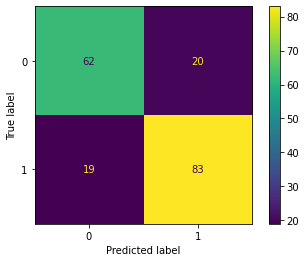

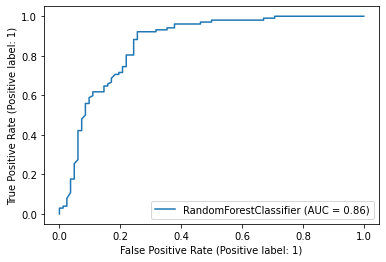

----------------------------------------
Features importance


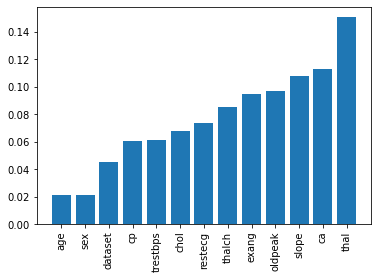

In [569]:
check_model('entropy',15,70)

F1-score of the best model is 0.8317757009345794
CV-score of the best model is 0.777027027027027
----------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.72      0.77        82
           1       0.79      0.87      0.83       102

    accuracy                           0.80       184
   macro avg       0.81      0.80      0.80       184
weighted avg       0.81      0.80      0.80       184

-
Confusion matrix
----------------------------------------
ROC-AUC curve


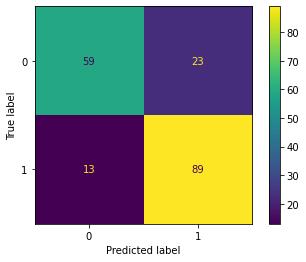

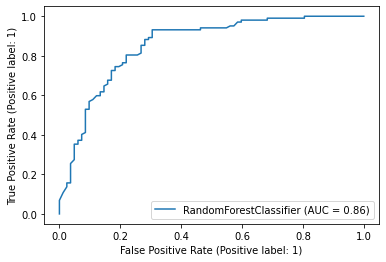

----------------------------------------
Features importance


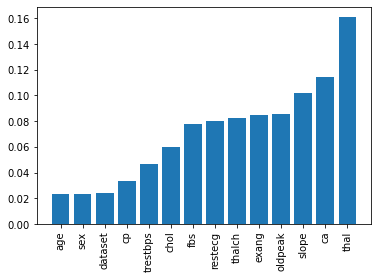

In [565]:
check_model('entropy',15,70)

In [ ]:
 'max_depth': 13, 'n_estimators': , 'criterion': }

In [538]:
model = RandomForestClassifier(criterion='entropy',max_depth=15,n_estimators=30,class_weight=class_weight,random_state=rs)
model.fit(features_train,target_train)

f1= f1_score(target_valid,model.predict(features_valid))
cv = cross_val_score(model,features_valid,target_valid).mean()
print(f'F1-score of the best model is {f1}')
print(f'CV-score of the best model is {cv}')

F1-score of the best model is 0.9268292682926829
CV-score of the best model is 0.831081081081081


In [ ]:
Trial 29 finished with value: 0.9162561576354681 and parameters: {'classifier': 'RandomForest', 'max_depth': 15, 'n_estimators': 30, 'criterion': 'entropy'}. Best is trial 29 with value: 0.9162561576354681.

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        82
           1       0.93      0.98      0.96       102

    accuracy                           0.95       184
   macro avg       0.95      0.95      0.95       184
weighted avg       0.95      0.95      0.95       184



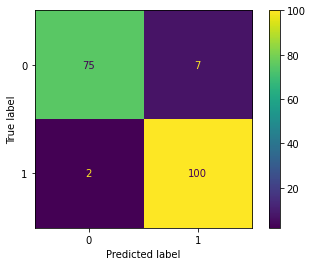

In [533]:
plot_confusion_matrix(model,features_valid,target_valid)
plt.show()

In [ ]:
model.predict_proba()

In [523]:
?roc_curve

In [ ]:
target_valid

In [ ]:
# заполняем пропуски
running = True
count = 0
while running:
    for i in range(1_379):
        df['city_centers_nearest'] = df['city_centers_nearest'].fillna(value=random.randrange(800,9_238),limit=1)
        count += 1
    running=False
print(count)
df['city_centers_nearest'].describe()

In [444]:
#  с помощью библиотеки optuna 
#  подберем лучшие гиперпараметры
# максимизируя F1-score


def objective(trial):
    clf_name = trial.suggest_categorical('classifier',['RandomForest'])
    if clf_name == 'RandomForest':
        max_depth = trial.suggest_int('max_depth',5,20)
        n_estimators = trial.suggest_int('n_estimators',10,200,10)
        criterion = trial.suggest_categorical('criterion',['gini','entropy'])
        clf_obj = RandomForestClassifier(criterion=criterion,max_depth=max_depth,n_estimators=n_estimators,class_weight=class_weight,random_state=rs)
    clf_obj.fit(features_train,target_train)
    score = f1_score(target_tv,clf_obj.predict(features_tv))
    f1_mean = score.mean()
    return f1_mean

In [445]:
# ищем гиперпараметры

if __name__ == '__main__':
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials =100)
    print(study.best_trial)

[I 2022-11-25 13:44:02,676] A new study created in memory with name: no-name-324b3553-f8f7-4574-81b9-d9f48bd7ffc6
[I 2022-11-25 13:44:02,842] Trial 0 finished with value: 0.837772397094431 and parameters: {'classifier': 'RandomForest', 'max_depth': 14, 'n_estimators': 50, 'criterion': 'gini'}. Best is trial 0 with value: 0.837772397094431.
[I 2022-11-25 13:44:03,094] Trial 1 finished with value: 0.8400954653937948 and parameters: {'classifier': 'RandomForest', 'max_depth': 5, 'n_estimators': 100, 'criterion': 'gini'}. Best is trial 1 with value: 0.8400954653937948.
[I 2022-11-25 13:44:03,218] Trial 2 finished with value: 0.8461538461538461 and parameters: {'classifier': 'RandomForest', 'max_depth': 17, 'n_estimators': 40, 'criterion': 'gini'}. Best is trial 2 with value: 0.8461538461538461.
[I 2022-11-25 13:44:03,647] Trial 3 finished with value: 0.838095238095238 and parameters: {'classifier': 'RandomForest', 'max_depth': 5, 'n_estimators': 150, 'criterion': 'gini'}. Best is trial 2 w

[I 2022-11-25 13:44:17,121] Trial 33 finished with value: 0.8516746411483254 and parameters: {'classifier': 'RandomForest', 'max_depth': 10, 'n_estimators': 60, 'criterion': 'entropy'}. Best is trial 33 with value: 0.8516746411483254.
[I 2022-11-25 13:44:17,429] Trial 34 finished with value: 0.8329297820823245 and parameters: {'classifier': 'RandomForest', 'max_depth': 9, 'n_estimators': 40, 'criterion': 'entropy'}. Best is trial 33 with value: 0.8516746411483254.
[I 2022-11-25 13:44:17,791] Trial 35 finished with value: 0.8516746411483254 and parameters: {'classifier': 'RandomForest', 'max_depth': 10, 'n_estimators': 60, 'criterion': 'entropy'}. Best is trial 33 with value: 0.8516746411483254.
[I 2022-11-25 13:44:18,245] Trial 36 finished with value: 0.8516746411483254 and parameters: {'classifier': 'RandomForest', 'max_depth': 10, 'n_estimators': 60, 'criterion': 'entropy'}. Best is trial 33 with value: 0.8516746411483254.
[I 2022-11-25 13:44:18,839] Trial 37 finished with value: 0.8

[I 2022-11-25 13:44:35,246] Trial 67 finished with value: 0.8433734939759034 and parameters: {'classifier': 'RandomForest', 'max_depth': 10, 'n_estimators': 80, 'criterion': 'entropy'}. Best is trial 33 with value: 0.8516746411483254.
[I 2022-11-25 13:44:35,793] Trial 68 finished with value: 0.8277511961722488 and parameters: {'classifier': 'RandomForest', 'max_depth': 9, 'n_estimators': 110, 'criterion': 'entropy'}. Best is trial 33 with value: 0.8516746411483254.
[I 2022-11-25 13:44:35,916] Trial 69 finished with value: 0.8274231678486998 and parameters: {'classifier': 'RandomForest', 'max_depth': 8, 'n_estimators': 20, 'criterion': 'entropy'}. Best is trial 33 with value: 0.8516746411483254.
[I 2022-11-25 13:44:36,281] Trial 70 finished with value: 0.8373205741626795 and parameters: {'classifier': 'RandomForest', 'max_depth': 11, 'n_estimators': 70, 'criterion': 'entropy'}. Best is trial 33 with value: 0.8516746411483254.
[I 2022-11-25 13:44:36,676] Trial 71 finished with value: 0.8

FrozenTrial(number=33, values=[0.8516746411483254], datetime_start=datetime.datetime(2022, 11, 25, 13, 44, 16, 783183), datetime_complete=datetime.datetime(2022, 11, 25, 13, 44, 17, 120938), params={'classifier': 'RandomForest', 'max_depth': 10, 'n_estimators': 60, 'criterion': 'entropy'}, distributions={'classifier': CategoricalDistribution(choices=('RandomForest',)), 'max_depth': IntDistribution(high=20, log=False, low=5, step=1), 'n_estimators': IntDistribution(high=200, log=False, low=10, step=10), 'criterion': CategoricalDistribution(choices=('gini', 'entropy'))}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=33, state=TrialState.COMPLETE, value=None)


FrozenTrial(number=32, values=[0.8532110091743118], datetime_start=datetime.datetime(2022, 11, 24, 19, 35, 58, 452193), datetime_complete=datetime.datetime(2022, 11, 24, 19, 35, 58, 674842), params={'classifier': 'RandomForest', 'max_depth': 13, 'n_estimators': 70, 'criterion': 'entropy'}, distributions={'classifier': CategoricalDistribution(choices=('RandomForest',)), 'max_depth': IntDistribution(high=20, log=False, low=5, step=1), 'n_estimators': IntDistribution(high=180, log=False, low=10, step=10), 'criterion': CategoricalDistribution(choices=('gini', 'entropy'))}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=32, state=TrialState.COMPLETE, value=None)

model = RandomForestClassifier(criterion=criterion,max_depth=max_depth,n_estimators=n_estimators,class_weight=class_weight,random_state=rs)

f1= f1_score(target_tv,model.predict(features_tv))

In [176]:
class_weight = {1:1,0:1.2}
rs=7

In [391]:
model = RandomForestClassifier(criterion='entropy',max_depth=13,n_estimators=70,class_weight=class_weight,random_state=rs)
model.fit(features_train,target_train)

f1= f1_score(target_tv,model.predict(features_tv))
cv = cross_val_score(model,features_tv,target_tv)
print(f'F1-score of the best model is {f1}')
print(f'CV-score of the best model is {cv}')

F1-score of the best model is 0.8532110091743118
CV-score of the best model is [0.83783784 0.72972973 0.78378378 0.75342466 0.82191781]


In [394]:
model = RandomForestClassifier(criterion='gini',max_depth=10,n_estimators=160,class_weight=class_weight,random_state=rs)
model.fit(features_train,target_train)

f1= f1_score(target_tv,model.predict(features_tv))
cv = cross_val_score(model,features_tv,target_tv,cv=6)
print(f'F1-score of the best model is {f1}')
print(f'CV-score of the best model is {cv}')

F1-score of the best model is 0.8518518518518519
CV-score of the best model is 0.8014718843645338


In [178]:
from sklearn.metrics import classification_report
print(classification_report(target_tv,model.predict(features_tv)))

              precision    recall  f1-score   support

           0       0.87      0.72      0.79       164
           1       0.80      0.91      0.85       204

    accuracy                           0.83       368
   macro avg       0.83      0.82      0.82       368
weighted avg       0.83      0.83      0.82       368



In [ ]:
# отображаем температурную карту корреляцию
sns.heatmap(data.drop(columns=['id'],axis=1).corr(),annot=True,cmap="YlGnBu",center=0,linewidth=3,linecolor='green')
plt.show()

In [ ]:
# отображаем температурную карту корреляцию
sns.heatmap(data.drop(columns=['id'],axis=1).corr(),annot=True,cmap="YlGnBu",center=0,linewidth=3,linecolor='green')
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# creating dummies for gender
data['Gender'] = data['Gender'].map({'Male':0, 'Female':1})
  
# the independent variables set
X = data[['Gender', 'Height', 'Weight']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

In [ ]:
def calc_VIF(x):
  vif= pd.DataFrame()
  vif['variables']=data.columns
  vif["VIF"]=[variance_inflation_factor(data.values,i) for i in range(data.shape[1])]

  return(vif)

In [ ]:
data.info()
data.shape[0]